# Data Exploration and Cleaning:
    -  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/pima-indian-diabetes/indians-diabetes.csv') 

df.columns=['NP', 'GC', 'BP', 'ST', 'I',  'BMI', 'PF', 'Age', 'Class']

In [3]:
print(df.head(), "\n")
df.info()

   NP   GC  BP  ST    I   BMI     PF  Age  Class
0   6  148  72  35    0  33.6  0.627   50      1
1   1   85  66  29    0  26.6  0.351   31      0
2   8  183  64   0    0  23.3  0.672   32      1
3   1   89  66  23   94  28.1  0.167   21      0
4   0  137  40  35  168  43.1  2.288   33      1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
NP       768 non-null int64
GC       768 non-null int64
BP       768 non-null int64
ST       768 non-null int64
I        768 non-null int64
BMI      768 non-null float64
PF       768 non-null float64
Age      768 non-null int64
Class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['ST'].replace(0, df[df['ST']!=0]['ST'].mean(), inplace=True)
df['GC'].replace(0, df[df['GC']!=0]['GC'].mean(), inplace=True)
df['BP'].replace(0, df[df['BP']!=0]['BP'].mean(), inplace=True)
df['BMI'].replace(0, df[df['BMI']!=0]['BMI'].mean(), inplace=True)
df['I'].replace(0, df[df['I']!=0]['I'].mean(), inplace=True)

In [5]:
X=df[['NP', 'GC', 'BP', 'ST', 'I',  'BMI', 'PF', 'Age']]
y=df['Class']

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [7]:
# PCA: _________________
from sklearn.decomposition import PCA 

pca=PCA(n_components=3, whiten=True, random_state=42)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

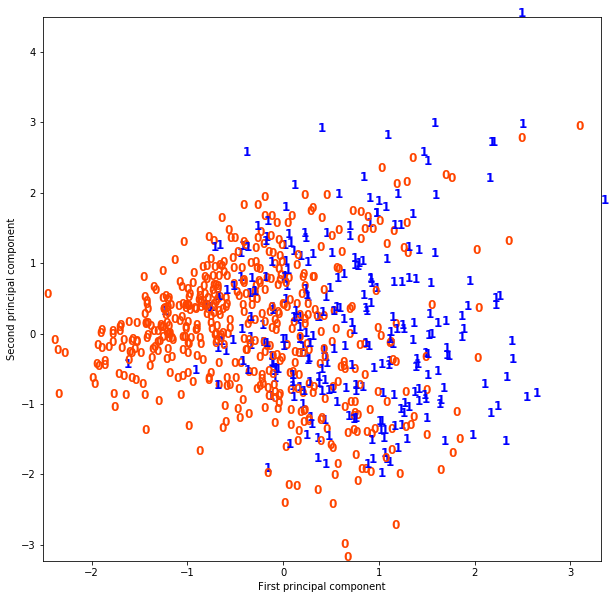

In [8]:
colors = ["orangered", "blue"] 
plt.figure(figsize=(10, 10)) 
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max()) 
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]), color = colors[y[i]],  
             fontdict={'weight': 'bold', 'size': 12}) 
    plt.xlabel("First principal component") 
    plt.ylabel("Second principal component") 

In [9]:
X_pca.shape

(768, 3)

In [10]:
df_pca=pd.concat((pd.DataFrame(X_pca), y) , axis=1) 
df_pca.columns=['X_1', 'X_2', 'X_3', 'Target']

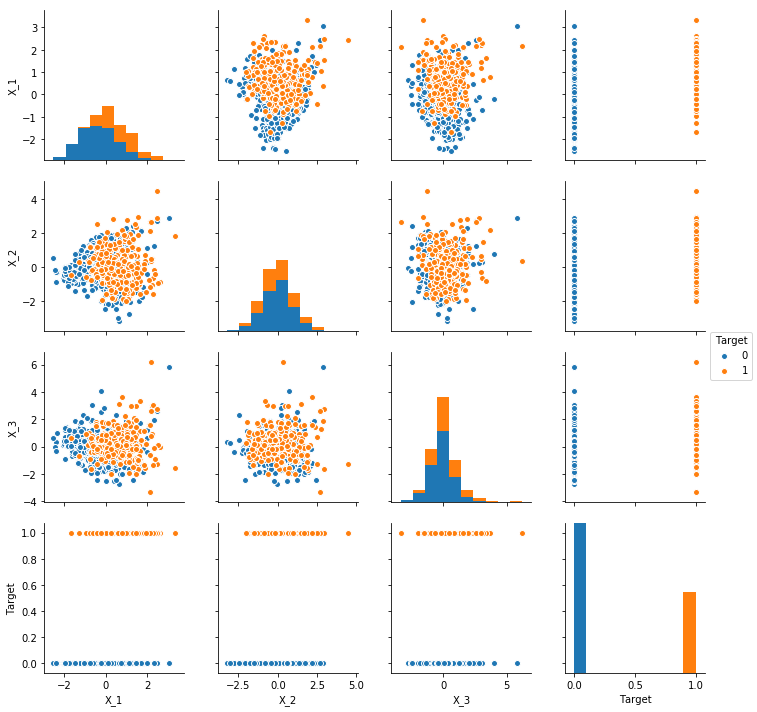

In [11]:
sns.pairplot(df_pca, hue='Target')

Text(0,0.5,'Principle components')

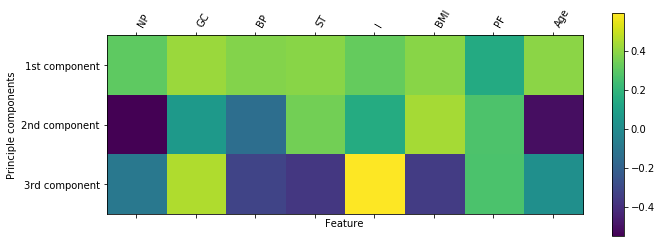

In [12]:
plt.matshow(pca.components_, cmap='viridis' )
plt.yticks([0,1,2], ['1st component', '2nd component', '3rd component'])
plt.colorbar()
plt.xticks(range(len(df.columns[:-1])), df.columns[:-1], rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principle components')

In [13]:
X_back=pca.inverse_transform(X_pca)

In [18]:
# Manifold Learning with t-SNE ____________________________________________________
from sklearn.manifold import TSNE 
tsne = TSNE(random_state=123) 

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# use fit_transform instead of fit, as TSNE has no transform method 
X_tsne = tsne.fit_transform(X_scaled)

In [19]:
X_tsne.shape

(768, 2)

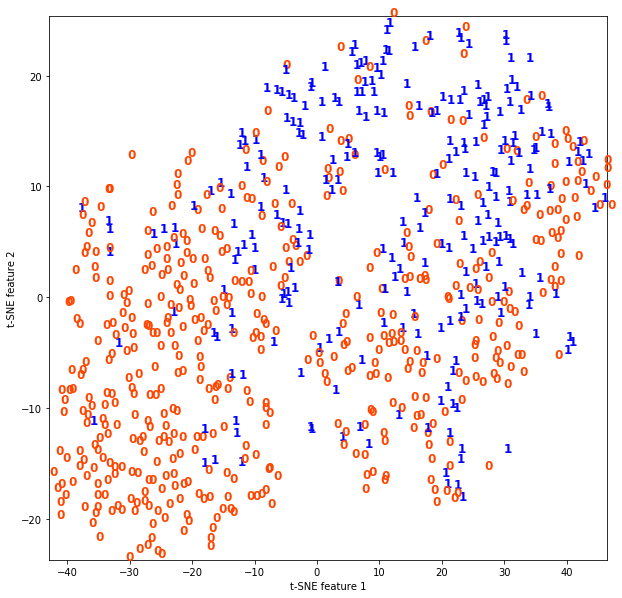

In [20]:
colors = ["orangered", "blue"] 
plt.figure(figsize=(10, 10)) 
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max()) 
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color = colors[y[i]],  fontdict={'weight': 'bold', 'size': 12}) 
    plt.xlabel("t-SNE feature 1") 
    plt.ylabel("t-SNE feature 2") 